In [22]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import nltk

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/volthai7us/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


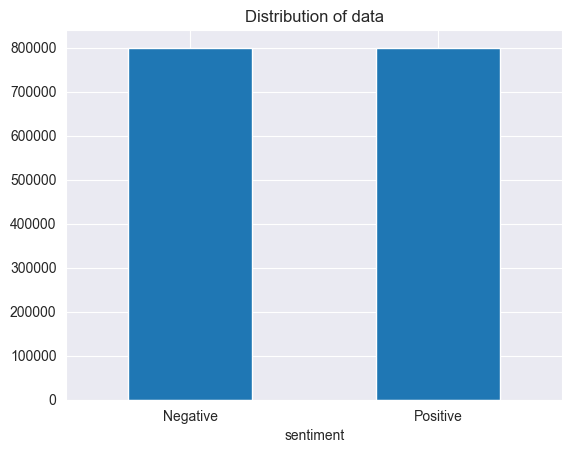

In [23]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('./data/data.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [24]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = []

In [25]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with ''
        tweet = re.sub(urlPattern,'',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to ''.
        tweet = re.sub(userPattern,'', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [26]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 94 seconds


In [27]:
import csv

# Aynı uzunlukta olup olmadıklarını kontrol et
if len(sentiment) != len(processedtext):
    print("Listeler aynı uzunlukta olmalıdır!")
else:
    # .csv dosyasına kaydet
    with open('./data/output.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        
        # Başlık satırını yaz
        csvwriter.writerow(['Sentiment', 'ProcessedText'])
        
        # Her bir satırı yaz
        for i in range(len(sentiment)):
            csvwriter.writerow([sentiment[i], processedtext[i]])

print("CSV dosyası başarıyla oluşturuldu.")

CSV dosyası başarıyla oluşturuldu.


In [28]:
import csv
import random

# Verileri bu liste içinde tutacağız
data = []

# CSV dosyasını oku ve verileri 'data' listesine aktar
with open('./data/output.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Başlık satırını oku ve sakla
    header = next(csvreader)
    
    # Geri kalan satırları oku
    for row in csvreader:
        data.append(row)

# Verileri karıştır (shuffle)
random.shuffle(data)

# Karıştırılmış verileri yeni bir CSV dosyasına yaz
with open('./data/output.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Başlık satırını yaz
    csvwriter.writerow(header)
    
    # Karıştırılmış verileri yaz
    for row in data:
        csvwriter.writerow(row)

print("CSV dosyası başarıyla karıştırıldı ve kaydedildi.")

CSV dosyası başarıyla karıştırıldı ve kaydedildi.
